In [100]:
from __future__ import print_function
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython
import librosa
import librosa.display
import soundfile as sf
import time

0.7936875 s


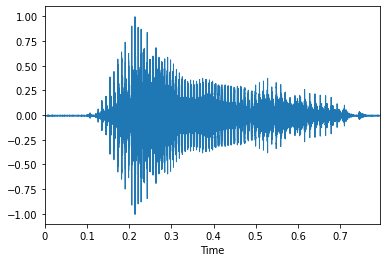

In [101]:
audio_path = "sound/vaiueo2d.wav"

# y,sr = librosa.load(path, sr=22050>0, mono=True or False, offset=0.0, duration=None, 
#                       dtype=<class 'numpy.float32'>, res_type='kaiser_best')
sr = 16000
y, sr = librosa.load(audio_path, sr=sr, mono=True)
y = librosa.util.normalize(y)

librosa.display.waveplot(y, sr=sr)
# librosa.display.waveplot(x, sr=sr)
IPython.display.Audio(data=y,rate=sr)
print(len(y)/sr, "s")

(257, 50)
CPU times: user 93.8 ms, sys: 0 ns, total: 93.8 ms
Wall time: 89.7 ms


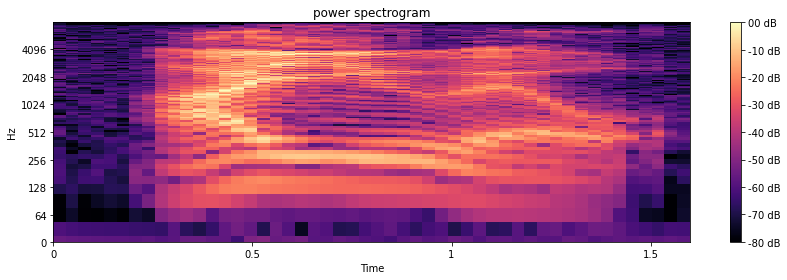

In [102]:
%%time
# 短時間フーリエ変換
n_fft = 512
hop_length = int(n_fft/2)
y_filt = librosa.effects.preemphasis(y)
S = np.abs(librosa.stft(y_filt, n_fft=n_fft, hop_length=hop_length))
# デシベル変換
log_S = librosa.amplitude_to_db(S, ref=np.max)
# ーーーー　plot start　ーーーー
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='log')
plt.title('power spectrogram')
plt.colorbar(format='%02.0f dB')
plt.tight_layout()
# ーーーー　plot end　ーーーー
print(log_S.shape)

In [103]:
def preEmphasis(signal, p):
    """プリエンファシスフィルタ"""
    # 係数 (1.0, -p) のFIRフィルタを作成
    return scipy.signal.lfilter([1.0, -p], 1, signal)

In [116]:
audio_path = "sound/a.wav"
y, sr = librosa.load(audio_path, sr=sr, mono=True)
print(len(y))
stream = librosa.stream(filename,
                      block_length=8,
                      frame_length=n_fft,
                      hop_length=hop_length,
                      fill_value=0)
count = 0
for y_block in stream:
    count = count + 1
    print(len(y_block))
    D_block = librosa.stft(y_block, center=False)
print(count)


49237
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304
2304

In [105]:
%%time
print(S.shape[1])
foumants = np.zeros((S.shape[1],4))
for iterator, frame in enumerate(S):
    index = librosa.frames_to_samples(frame)
    s = y[index]
    # print(iterator)
    print(index)
    # プリエンファシスフィルタをかける
    coef = 0.97       # プリエンファシス係数
    s_filt = preEmphasis(s, p)
    # ハミング窓をかける
    hammingWindow = np.hamming(len(s_filt))
    s_filt = s_filt * hammingWindow
    # 線形予測係数を求める。　次数は予想フォルマント数＊２＋２（一般ルール）
    lpcOrder = 18
    a = librosa.lpc(s_filt[0:], lpcOrder)
    rts = np.roots(a)
    # LPC 係数は実数値なので、根は複素共役対。
    rts = rts[np.imag(rts) >= 0]
    # 根に対応する角度を求める。
    angz = np.arctan2(np.imag(rts), np.real(rts))
    # 角度が示すラジアン/サンプル単位の角周波数をヘルツに変換
    frqs = angz * sr / (2 *  np.pi)
    # フォルマントの帯域幅は、予測多項式零点の単位円からの距離によって表される。
    sort_index = np.argsort(frqs)
    frqs.sort()
    bw = np.zeros(len(rts))
    for i, index in enumerate(sort_index) :
        bw[i] = -1/2 * (sr/(2*np.pi)) * np.log(abs(rts[index]))
    # フォルマント周波数は 90 Hz を超えること、また帯域幅は 400 Hz 未満
    nn = 0
    foumant = np.empty(0)
    for kk in range(len(frqs)) :
        if frqs[kk] > 90 and bw[kk] < 600 :
            foumant = np.hstack([foumant, frqs[kk]])
            nn = nn+1
            if nn == 4: break
    foumants[iterator,:] = foumant

50
[ 7  6  6  6  5  5  5  6  4  5  7  7  6  6  3 12 14  7  8 10  5  5  6  6
  4  4  3  5  6  5  5  8  6  4  6  6  5  6  5  5  7  6  4  5  6  5  6  5
  6  5]
[4 3 3 3 2 2 2 2 2 5 1 1 2 6 9 6 1 8 4 0 5 4 1 1 3 4 6 3 2 3 4 1 2 5 1 2 5
 2 6 7 4 5 8 8 6 4 3 2 3 3]
[ 0  0  0  0  0  0  1  0 14 20 26 19  5 10 11  9  9  7  6  7  7  6  6  6
  5  6  6  6  4  2  9 19 32 41 47 47 48 47 43 42 37 32 25 16  4  3  0  0
  0  0]
[  0   1   0   0   1   0   3  11  40  71 109 136 138 122  84  61  38  35
  39  44  42  36  43  57  67  72  76  80  87  92  95 109 117 116 102  88
  76  67  63  46  43  33  23  18  14   2   1   2   0   0]
[  1   2   1   1   1   1   8   4  38  65  98 163 257 348 378 385 343 311
 299 284 264 244 236 240 246 242 233 222 200 171 143 122  99  79  56  34
  43  37  26  59  52  41  46  41  22   3   3   5   0   0]
[  3   1   3   3   1   1  16  16  18   9  29  38 126 238 360 424 473 411
 353 321 303 279 241 213 188 179 181 168 132  77  24  34  38  88 133 156
 151 161 161 146 127 106  77  44

IndexError: index 50 is out of bounds for axis 0 with size 50

In [21]:
def autocorr(x, nlags=None):
    """自己相関関数を求める
    x:     信号
    nlags: 自己相関関数のサイズ（lag=0からnlags-1まで）
           引数がなければ（lag=0からlen(x)-1まですべて）
    """
    N = len(x)
    if nlags == None: nlags = N
    r = np.zeros(nlags)
    for lag in range(nlags):
        for n in range(N - lag):
            r[lag] += x[n] * x[n + lag]
    return r

In [22]:
def LevinsonDurbin(r, lpcOrder):
    """Levinson-Durbinのアルゴリズム
    k次のLPC係数からk+1次のLPC係数を再帰的に計算して
    LPC係数を求める"""
    # LPC係数（再帰的に更新される）
    # a[0]は1で固定のためlpcOrder個の係数を得るためには+1が必要
    a = np.zeros(lpcOrder + 1)
    e = np.zeros(lpcOrder + 1)

    # k = 1の場合
    a[0] = 1.0
    a[1] = - r[1] / r[0]
    e[1] = r[0] + r[1] * a[1]
    lam = - r[1] / r[0]

    # kの場合からk+1の場合を再帰的に求める
    for k in range(1, lpcOrder):
        # lambdaを更新
        lam = 0.0
        for j in range(k + 1):
            lam -= a[j] * r[k + 1 - j]
        lam /= e[k]

        # aを更新
        # UとVからaを更新
        U = [1]
        U.extend([a[i] for i in range(1, k + 1)])
        U.append(0)

        V = [0]
        V.extend([a[i] for i in range(k, 0, -1)])
        V.append(1)

        a = np.array(U) + lam * np.array(V)

        # eを更新
        e[k + 1] = e[k] * (1.0 - lam * lam)

    return a, e[-1]

320
(320,)


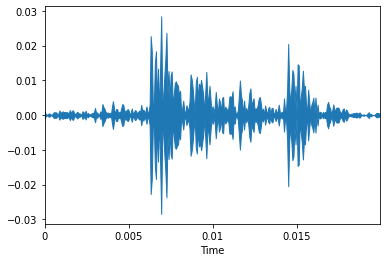

In [112]:
t = np.arange(0.0, len(y) / sr, 1/sr)

center = len(y)/2
cuttime = 0.02
s = y[int(center - cuttime/2*sr) : int(center + cuttime/2*sr)]
print(len(s))
# プリエンファシスフィルタをかける
p = 0.97         # プリエンファシス係数
s = preEmphasis(s, p)

# ハミング窓をかける
hammingWindow = np.hamming(len(s))
s = s * hammingWindow

librosa.display.waveplot(s, sr=sr)
print(s.shape)

*** result ***
a: [ 1.         -1.2036644   1.22011462 -0.66472104  0.10702519 -0.31996473
  0.25354305 -0.50396088  0.06404313 -0.12325623  0.34314522 -0.21808357
  0.23196684]
e: 0.023328242668712328
2048


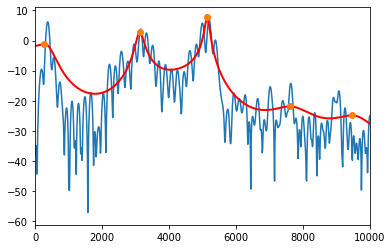

[ 269.16503906 3122.31445312 5135.66894531 7601.22070312 9453.07617188]
CPU times: user 156 ms, sys: 31.2 ms, total: 188 ms
Wall time: 172 ms


In [56]:
%%time
lpcOrder = 12
r = autocorr(s, lpcOrder + 1)
a, e  = LevinsonDurbin(r, lpcOrder)

print ("*** result ***")
print ("a:", a)
print ("e:", e)

# LPC係数の振幅スペクトルを求める
nfft = 2048   # FFTのサンプル数
fscale = np.fft.fftfreq(nfft, d = 1.0 / sr)[:int(nfft/2)]

# オリジナル信号の対数スペクトル
spec = np.abs(np.fft.fft(s, nfft))
logspec = 20 * np.log10(spec)
# plt.plot(fscale, logspec[:int(nfft/2)])
plt.plot(fscale, logspec[:int(nfft/2)])

# LPC対数スペクトル
w, h = scipy.signal.freqz(np.sqrt(e), a, nfft, "whole")
lpcspec = np.abs(h)
loglpcspec = 20 * np.log10(lpcspec)
plt.plot(fscale, loglpcspec[:int(nfft/2)], "r", linewidth=2)
print(len(loglpcspec))

foumants = scipy.signal.argrelmax(loglpcspec, order=50)
foumants = np.array(foumants)
foumants = foumants[0,:]
plt.plot(fscale[foumants[:5]], loglpcspec[foumants[:5]],marker='o', linestyle='None')

plt.xlim((0, 10000))
plt.show()
print(fscale[foumants[:5]])

In [1109]:
%%time
# 線形予測係数を求める。　次数は予想フォルマント数＊２＋２（一般ルール）
lpcOrder = 18
a = librosa.lpc(s[0:], lpcOrder)
rts = np.roots(a)
# LPC 係数は実数値なので、根は複素共役対。
rts = rts[np.imag(rts) >= 0]
# 根に対応する角度を求める。
angz = np.arctan2(np.imag(rts), np.real(rts))
# 角度が示すラジアン/サンプル単位の角周波数をヘルツに変換
frqs = angz * sr / (2 *  np.pi)
# フォルマントの帯域幅は、予測多項式零点の単位円からの距離によって表される。
sort_index = np.argsort(frqs)
frqs.sort()

bw = np.zeros(len(rts))
for i, index in enumerate(sort_index) :
    bw[i] = -1/2 * (sr/(2*np.pi)) * np.log(abs(rts[index]))

nn = 0
foumants = np.empty(0)
for kk in range(len(frqs)) :
    if frqs[kk] > 90 and bw[kk] < 400 :
        foumants = np.hstack([foumants, frqs[kk]])
        nn = nn+1

print(frqs)
print(bw)
print(foumants)


[ 283.32032436 1810.60127356 2351.66894439 3273.66681644 3728.02422694
 3794.99422907 5359.6041675  6488.50276023 7417.07657097]
[  6.85742851  72.95337554  31.56387889 336.60650434  36.87554922
 188.58933951  53.55274005  62.72387549 133.0337909 ]
[ 283.32032436 1810.60127356 2351.66894439 3273.66681644 3728.02422694
 3794.99422907 5359.6041675  6488.50276023 7417.07657097]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.72 ms


(12699,)
(25,)


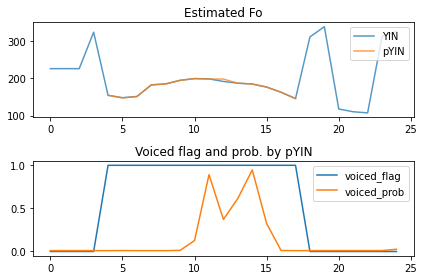

In [1110]:
fmin, fmax = 100, 520
# Fundamental frequency (F0) estimation using the YIN algorithm.
fo_yin = librosa.yin(y, fmin, fmax)
# Fundamental frequency (F0) estimation using probabilistic YIN (pYIN).
fo_pyin, voiced_flag, voiced_prob = librosa.pyin(y, fmin, fmax)
# ーーーー　plot start　ーーーー
plt.subplot(2,1,1)
plt.plot(fo_yin,  label="YIN",  alpha=0.75)
plt.plot(fo_pyin, label="pYIN", alpha=0.75) 
plt.legend(loc='upper right')
plt.title("Estimated Fo")

plt.subplot(2,1,2)
plt.plot(voiced_flag, label="voiced_flag")
plt.plot(voiced_prob, label="voiced_prob")
plt.title("Voiced flag and prob. by pYIN")
plt.legend(loc='upper right')

plt.tight_layout()
# ーーーー　plot end　ーーーー
print(y.shape)
print(voiced_flag.shape)

In [1111]:
# Write out audio as 24bit PCM WAV
data = 
samplerate = sr
sf.write('sound/test.wav', data, samplerate, subtype='PCM_24')

SyntaxError: invalid syntax (<ipython-input-1111-1734fc54818a>, line 2)